In [1]:
#from sklearn.neighbors import NearestNeighbors
import numpy as np
from matplotlib import pyplot as plt
#import corner
import urllib
import os
import sys
from astropy.io import fits
from sklearn.model_selection import train_test_split
import pandas as pd
from astropy.cosmology import Planck15 as P15
from astropy import units as u
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
sns.set_context("talk",font_scale=1.5)

sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['ytick.major.size'] = 15

plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [3]:
#SNII_Z1 = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/scripts/SNII_GHOST_Z1_005.HOSTLIB", delim_whitespace=True)
#SNIbc_Z1 = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/scripts/UNMATCHED_KN_SHIFT_GHOST_Z1_005.HOSTLIB", delim_whitespace=True)

#SNIa_Z1 = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/HOSTLIBs/Z1_HOSTLIB/SNIa_GHOST.HOSTLIB", delim_whitespace=True)
#SNIbc_Z1 = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/HOSTLIBs/Z1_HOSTLIB/SNIbc_GHOST.HOSTLIB", delim_whitespace=True)
#UNW_Z1 = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/HOSTLIBs/Z1_HOSTLIB/UNMATCHED_COSMODC2.HOSTLIB", delim_whitespace=True)
#UNW_SHIFT_Z1_LOWZ = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/scripts/UNMATCHED_KN_SHIFT_GHOST_Z1_005.HOSTLIB", delim_whitespace=True)

In [7]:
#SNII_stitch = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/HOSTLIBs/Z3_HOSTLIB/STITCH/SNII_GHOST_FULL.HOSTLIB_INSPEC")

In [10]:
#SNII_stitch['ZTRUE']

0          0.052463
1          0.084224
2          0.054004
3          0.051521
4          0.066985
             ...   
2141478    0.028277
2141479    0.039999
2141480    0.046915
2141481    0.047217
2141482    0.047565
Name: ZTRUE, Length: 2141483, dtype: float64

In [291]:
#SNIbc_Z3 = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/HOSTLIBs/Z3_HOSTLIB/UNMATCHED_KN_SHIFT_GHOST.HOSTLIB", delim_whitespace=True)

In [292]:
#SNIbc_comb = pd.concat([SNIbc_Z3, SNIbc_Z1])

In [293]:
#SNIbc_comb.columns.values

array(['VARNAMES:', 'GALID', 'RA_GAL', 'DEC_GAL', 'ZTRUE', 'ZPHOT',
       'ZPHOT_ERR', 'u_obs', 'u_obs_err', 'g_obs', 'g_obs_err', 'r_obs',
       'r_obs_err', 'i_obs', 'i_obs_err', 'z_obs', 'z_obs_err', 'Y_obs',
       'Y_obs_err', 'SQRADIUS', 'a0_Sersic', 'b0_Sersic', 'n0_Sersic',
       'w0_Sersic', 'a1_Sersic', 'b1_Sersic', 'n1_Sersic', 'w1_Sersic',
       'a_rot', 'ELLIPTICITY', 'LOGMASS', 'LOG_SFR', 'OBJID2', 'NBR_LIST'],
      dtype=object)

In [294]:
#del SNIbc_comb['NBR_LIST']

Text(0, 0.5, '$g-r$')

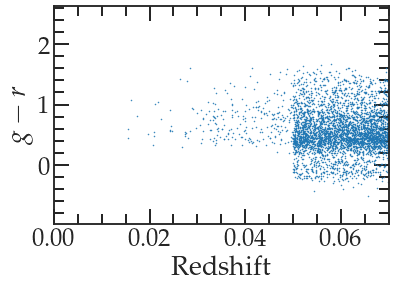

In [295]:
#plt.plot(SNIbc_comb['ZPHOT'], SNIbc_comb['g_obs'] - SNIbc_comb['r_obs'], 'o', ms=0.5)
#plt.xlim((0, 0.07))
#plt.xlabel("Redshift")
#plt.ylabel(r"$g-r$")

In [296]:
#SNIbc_comb.to_csv("/Users/alexgagliano/Documents/Research/DESC/tables/HOSTLIBs/Z3_HOSTLIB/UNMATCHED_KN_SHIFT_GHOST_FULL.HOSTLIB",index=False)

In [68]:
moment_path = "/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample"
FullImageMoments = pd.read_csv(moment_path + "/FullImageMomentsCatalog.tar.gz")

KeyError: 'galaxy_id'

In [200]:
#SNII_Z1.columns.values

array(['galaxy_id', 'DC2redshift', 'PZflowredshift', 'Mag_true_g_sdss_z0',
       'Mag_true_r_sdss_z0', 'Mag_true_i_sdss_z0', 'Mag_true_z_sdss_z0',
       'R_kpc', 'mag_true_u_lsst', 'mag_true_g_lsst', 'mag_true_r_lsst',
       'mag_true_i_lsst', 'mag_true_z_lsst', 'mag_true_Y_lsst',
       'size_true', 'size_minor_true', 'size_disk_true',
       'size_minor_disk_true', 'size_bulge_true', 'size_minor_bulge_true',
       'sersic_disk', 'sersic_bulge', 'position_angle_true', 'ra', 'dec',
       'mag_err_u_photoz', 'mag_err_g_photoz', 'mag_err_r_photoz',
       'mag_err_i_photoz', 'mag_err_z_photoz', 'mag_err_y_photoz',
       'totalStarFormationRate', 'stellar_mass', 'bulge_to_total_ratio_i',
       'Mag_true_u_lsst', 'Mag_true_g_lsst', 'Mag_true_r_lsst',
       'Mag_true_i_lsst', 'Mag_true_z_lsst', 'Mag_true_Y_lsst',
       'GHOST_transientclass', 'Ixx_pixel', 'Iyy_pixel', 'Ixy_pixel',
       'e_pixel', 'SQRADIUS'], dtype=object)

(0.0, 3.0)

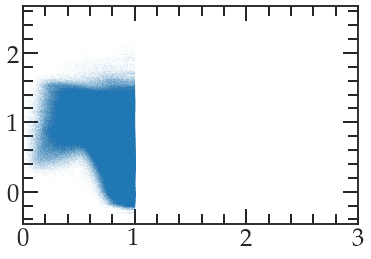

In [210]:
#SNII_Z1 = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample/cdc2_matched_fullSamples/cdc2_matched_ghost_SNII_unq_zwgt_5pct_k2081_wIxx.tar.gz")
#SNII_Z1 = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample/cdc2_matched_fullSamples/cdc2_matched_ghost_SNIa_unq_zwgt_5pct_k815_wEll.tar.gz")
#SNII_Z1 = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample/cdc2_matched_fullSamples/rand_hostlib_wIxx.tar.gz")

#SNII_Z1_LOWZ = SNII_Z1[SNII_Z1['PZflowredshift'] < 0.05]

#plt.plot(SNII_Z1['PZflowredshift'], SNII_Z1['mag_true_g_lsst'] - SNII_Z1['mag_true_r_lsst'], 'o', ms=0.01)
#plt.xlim((0, 3))

In [213]:
#SNII_Z1_LOWZ

,Unnamed: 0,Unnamed: 0.1,DC2SFRtot,DC2redshift,Ixx_pixel,Iyy_pixel,Mag_true_g_sdss_z0,Mag_true_i_sdss_z0,Mag_true_r_sdss_z0,Mag_true_z_sdss_z0,...,sersic_bulge,sersic_disk,size_bulge_true,size_disk_true,size_minor_bulge_true,size_minor_disk_true,size_minor_true,size_true,stellar_mass,bulge_to_total_ratio_i
2956,2956,3600,6.345800e+04,0.181597,6.620445,7.150298,-16.379559,-16.754051,-16.633600,-16.806017,...,4.0,1.0,0.185818,0.395016,0.178291,0.286904,0.286904,0.395016,7.382722e+07,0.000000
21593,21593,26092,1.449296e+05,0.576319,11.866302,7.870477,-16.817688,-17.737383,-17.439304,-17.913446,...,4.0,1.0,0.160395,0.387586,0.160168,0.354721,0.354721,0.387586,1.059837e+08,0.000000
22210,22210,26815,4.131252e+06,0.099210,7.473209,4.749688,-14.863213,-15.529127,-15.311666,-15.647894,...,4.0,1.0,0.124015,0.224567,0.044189,0.028029,0.035781,0.195688,1.751106e+07,0.295775
29107,29107,35176,1.487716e+07,0.240893,3.836322,4.058988,-15.382667,-16.027157,-15.801245,-16.155098,...,4.0,1.0,0.053536,0.086809,0.053431,0.068423,0.067799,0.084766,1.690809e+07,0.060685
31966,31966,38674,7.103617e+07,0.278945,5.653282,5.730802,-16.474009,-17.163597,-16.892086,-17.347770,...,4.0,1.0,0.119146,0.226345,0.105143,0.070941,0.073540,0.221335,1.324408e+08,0.044591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348822,2348822,2907714,1.099601e+08,0.228127,NaN,NaN,-17.777246,-18.493765,-18.238937,-18.655802,...,4.0,1.0,0.223636,0.439874,0.162466,0.173524,0.178303,0.305039,5.683823e+08,0.621706
2358693,2358693,2920195,3.371280e+07,0.059239,NaN,NaN,-16.335579,-16.856197,-16.673730,-16.951420,...,4.0,1.0,0.393285,0.751226,0.377720,0.452765,0.452807,0.747460,1.651499e+08,0.011541
2371014,2371014,2935726,8.516060e+07,0.119541,NaN,NaN,-17.594793,-18.377563,-18.111214,-18.550964,...,4.0,1.0,0.552004,1.238304,0.465363,0.380286,0.472828,0.901000,3.907988e+08,0.506136
2386350,2386350,2955096,3.599174e+07,0.253794,NaN,NaN,-20.912410,-22.083683,-21.705994,-22.390793,...,4.0,1.0,0.595800,0.864214,0.405743,0.231784,0.382770,0.637045,6.316396e+10,0.846027


In [214]:
SNII_Z1_LOWZ['Ixx_pixel']  =np.nan
SNII_Z1_LOWZ['Iyy_pixel']  =np.nan

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [215]:
SNII_Z1_LOWZ = SNII_Z1_LOWZ.merge(FullImageMoments, on='galaxy_id')

SNII_Z1_LOWZ['Ixx_pixel'] = SNII_Z1_LOWZ['Ixx_pixel_y'].values
SNII_Z1_LOWZ['Iyy_pixel'] = SNII_Z1_LOWZ['Iyy_pixel_y'].values

In [216]:
SNII_Z1_LOWZ.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'DC2SFRtot', 'DC2redshift',
       'Ixx_pixel_x', 'Iyy_pixel_x', 'Mag_true_g_sdss_z0',
       'Mag_true_i_sdss_z0', 'Mag_true_r_sdss_z0', 'Mag_true_z_sdss_z0',
       'PZflowSFRtot', 'PZflowredshift', 'cosmodc2_id_truth', 'dec',
       'g-r', 'galaxy_id', 'i-z', 'mag_err_g_photoz', 'mag_err_i_photoz',
       'mag_err_r_photoz', 'mag_err_u_photoz', 'mag_err_y_photoz',
       'mag_err_z_photoz', 'mag_true_Y_lsst', 'mag_true_g_lsst',
       'mag_true_i_lsst', 'mag_true_r_lsst', 'mag_true_u_lsst',
       'mag_true_z_lsst', 'morphology/totalEllipticity',
       'position_angle_true', 'r-i', 'ra', 'sersic_bulge', 'sersic_disk',
       'size_bulge_true', 'size_disk_true', 'size_minor_bulge_true',
       'size_minor_disk_true', 'size_minor_true', 'size_true',
       'stellar_mass', 'bulge_to_total_ratio_i', 'objectId',
       'Ixx_pixel_y', 'Iyy_pixel_y', 'Ixy_pixel', 'Ixx_pixel',
       'Iyy_pixel'], dtype=object)

In [217]:
#FullImageMoments.rename(columns={"cosmodc2_id_truth": "GALID"}, inplace=True)
#FullImageMoments.rename(columns={"galaxy_id": "GALID"}, inplace=True)
#FullImageMoments.rename(columns={"GALID": "galaxy_id"}, inplace=True)

#SNII_Z1_LOWZ = SNII_Z1_LOWZ.merge(FullImageMoments, on='galaxy_id')


SNII_Z1_LOWZ.loc[SNII_Z1_LOWZ['Ixx_pixel'] != SNII_Z1_LOWZ['Ixx_pixel'], 'Ixx_pixel'] = -499.5
SNII_Z1_LOWZ.loc[SNII_Z1_LOWZ['Iyy_pixel'] != SNII_Z1_LOWZ['Iyy_pixel'], 'Iyy_pixel'] = -499.5

xx = SNII_Z1_LOWZ['Ixx_pixel']
yy = SNII_Z1_LOWZ['Iyy_pixel']
xy = SNII_Z1_LOWZ['Ixy_pixel']

num = (xx - yy)**2 + 4*xy**2
den = (xx + yy)**2

SNII_Z1_LOWZ['ELLIPTICITY'] = np.sqrt(num/den)

SNII_Z1_LOWZ['SQRADIUS_PX'] = SNII_Z1_LOWZ['Ixx_pixel'] + SNII_Z1_LOWZ['Iyy_pixel']
SNII_Z1_LOWZ['SQRADIUS'] = SNII_Z1_LOWZ['SQRADIUS_PX']*0.2**2 # 0.2''/px

In [84]:
SNII_comb = SNII_comb[['VARNAMES:', 'GALID', 'RA_GAL', 'DEC_GAL', 'ZTRUE', 'ZPHOT',
       'ZPHOT_ERR', 'u_obs', 'u_obs_err', 'g_obs', 'g_obs_err', 'r_obs',
       'r_obs_err', 'i_obs', 'i_obs_err', 'z_obs', 'z_obs_err', 'Y_obs',
       'Y_obs_err', 'SQRADIUS', 'a0_Sersic', 'b0_Sersic', 'n0_Sersic',
       'w0_Sersic', 'a1_Sersic', 'b1_Sersic', 'n1_Sersic', 'w1_Sersic',
       'a_rot', 'ELLIPTICITY', 'LOGMASS', 'LOG_SFR', 'OBJID2',
       'Ixx_pixel', 'Iyy_pixel', 'Ixy_pixel','NBR_LIST']]

SNII_comb.drop_duplicates(subset=['GALID'], inplace=True)
del SNII_comb['objectId']
del SNII_comb['SQRADIUS_PX']
SNII_comb.to_csv("SNII_GHOST_Z3Patch.HOSTLIB",index=False, sep=' ')

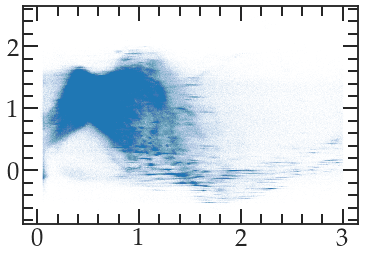

In [91]:
plt.plot(SNII_comb['ZTRUE'], SNII_comb['g_obs'] - SNII_comb['r_obs'], 'o', ms=0.1, alpha=0.05)

In [3]:
path = '/Users/alexgagliano/Documents/Research/DESC/tables/CosmoDC2'
path_matched = '/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample/matchedSamples_1218/'

fnII = path_matched + "/cdc2_matched_ghost_SNII_z3_unq_zwgt_5pct_k3147_SFRMsol.tar.gz"
fnIa = path_matched + "/cdc2_matched_ghost_SNIa_z3_unq_zwgt_5pct_k678_SFRMsol.tar.gz"
fnIbc = path_matched + "/cdc2_matched_ghost_SNIbc_z3_unq_zwgt_5pct_k9508_SFRMsol.tar.gz"

dc2_Ia = pd.read_csv(fnIa)
dc2_II = pd.read_csv(fnII)
dc2_Ibc = pd.read_csv(fnIbc)

dc2_rand = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample/matchedSamples_1218/rand_hostlib_SFRMsol_bulge.tar.gz")
#dc2_rand = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample/cdc2_matched_fullSamples/rand_hostlib_ellip.tar.gz")

In [43]:
dc2_rand['mag_err_g_photoz'].count()

87313

In [44]:
len(dc2_rand)

3000000

In [45]:
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
lum_dist = cosmo.luminosity_distance(dc2_rand['PZflowredshift'])  
lum_dist = np.array([x.to(u.pc).value for x in lum_dist])
for band in ['u', 'g', 'r', 'i', 'z', 'Y']:
    #now convert back with the NEW redshift
    dc2_rand['Mag_true_%s_lsst'%band] = dc2_rand['mag_true_%s_lsst'%band] - 2.5 * np.log10((lum_dist/10)**2)

In [46]:
#dc2_rand['redshift'] = dc2_rand['PZflowredshift']
#dc2_rand['SFRtot'] = dc2_rand['PZflowSFRtot']
#dc2_rand['GHOST_objID'] = -999
#dc2_rand['totalEllipticity'] = dc2_rand['morphology/totalEllipticity']

In [47]:
dc2_rand.sample(n=100).columns.values

array(['galaxy_id', 'DC2redshift', 'PZflowredshift', 'Mag_true_g_sdss_z0',
       'Mag_true_r_sdss_z0', 'Mag_true_i_sdss_z0', 'Mag_true_z_sdss_z0',
       'R_kpc', 'mag_true_u_lsst', 'mag_true_g_lsst', 'mag_true_r_lsst',
       'mag_true_i_lsst', 'mag_true_z_lsst', 'mag_true_Y_lsst',
       'size_true', 'size_minor_true', 'size_disk_true',
       'size_minor_disk_true', 'size_bulge_true', 'size_minor_bulge_true',
       'sersic_disk', 'sersic_bulge', 'position_angle_true', 'ra', 'dec',
       'mag_err_u_photoz', 'mag_err_g_photoz', 'mag_err_r_photoz',
       'mag_err_i_photoz', 'mag_err_z_photoz', 'mag_err_y_photoz',
       'totalStarFormationRate', 'stellar_mass', 'bulge_to_total_ratio_i',
       'Mag_true_u_lsst', 'Mag_true_g_lsst', 'Mag_true_r_lsst',
       'Mag_true_i_lsst', 'Mag_true_z_lsst', 'Mag_true_Y_lsst'],
      dtype=object)

In [85]:
dc2_full.to_csv("/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample/cdc2_matched_fullSamples/rand_hostlib_ellip.tar.gz",index=False)

In [48]:
#oldII_hostlib = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample/cdc2_matched_ghost_SNII_unq_zwgt_5pct_k10.csv")

In [49]:
#plt.hist(np.log10(dc2_Ia['DC2SFRtot']))

In [8]:
#plt.hist(np.log10(dc2_II['SFRtot']))

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 2.0)

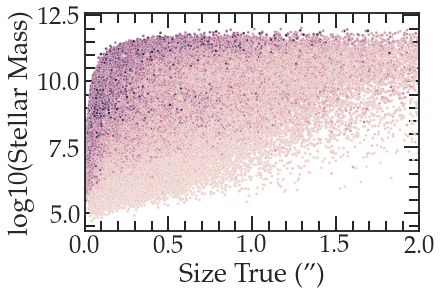

In [51]:
plt.figure(figsize=(10,7))
sns.scatterplot(dc2_rand['size_true'], np.log10(dc2_rand['stellar_mass']), hue=dc2_rand['PZflowredshift'], legend=False, s=8)
plt.xlabel("Size True ('')")
plt.ylabel("log10(Stellar Mass)")
plt.xlim((0, 2))

In [52]:
dc2_rand = dc2_rand[(np.log10(dc2_rand['totalStarFormationRate'])-9) > -7.5]

In [219]:
#quality cuts SNII_Z1_LOWZ
SNII_Z1_LOWZ = SNII_Z1_LOWZ[(np.log10(SNII_Z1_LOWZ['DC2SFRtot'])-9) > -7.5]
#dc2_II = dc2_II[(np.log10(dc2_II['totalStarFormationRate'])-9) > -7.5]
#dc2_Ia = dc2_Ia[(np.log10(dc2_Ia['totalStarFormationRate'])-9) > -7.5]
#dc2_Ibc = dc2_Ibc[(np.log10(dc2_Ibc['totalStarFormationRate'])-9) > -7.5]

In [ ]:
dc2_Ia.loc[dc2_Ia['galaxy_id'] == 11314214338, 'Mag_true_i_sdss_z0']
dc2_Ia.loc[dc2_Ia['galaxy_id'] == 11314214338, 'mag_true_r_lsst']

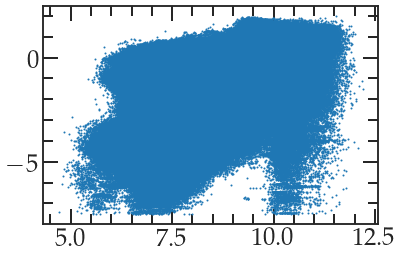

In [53]:
plt.plot(np.log10(dc2_rand['stellar_mass']), np.log10(dc2_rand['totalStarFormationRate'])-9, 'o', ms=1)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(np.log10(dc2_II['stellar_mass']), np.log10(dc2_II['totalStarFormationRate'])-9, 'o', ms=0.01)
plt.xlabel("Stellar Mass")
plt.ylabel("cosmoDC2 SFR")
plt.title("SN Ib/c Hostlib")

In [220]:
#dc2_Ia['GHOST_transientclass'] = 'SN Ia'
SNII_Z1_LOWZ['GHOST_transientclass'] = 'UNMATCHED_COSMODC2'
#dc2_Ibc['GHOST_transientclass'] = 'SN Ibc'
#dc2_Ib['GHOST_transientclass'] = 'SN Ib'
#dc2_Ic['GHOST_transientclass'] = 'SN Ic'
#dc2_SLSN['GHOST_transientclass'] = 'SLSN-I'
#dc2_IIP['GHOST_transientclass'] = 'SN IIP'
#dc2_IIb['GHOST_transientclass'] = 'SN IIb'
#dc2_IIn['GHOST_transientclass'] = 'SN IIn'

#take half of these catalogs from what we've queried before

#dc2_full = pd.concat([dc2_SLSN],ignore_index=True)
#dc2_full = pd.concat([dc2_Ia, dc2_II, dc2_Ibc], ignore_index=True)
#dc2_full = pd.concat([dc2_Ia, dc2_II, dc2_Ibc, dc2_Ib, dc2_Ic, dc2_SLSN, dc2_IIP, dc2_IIb, dc2_IIn],ignore_index=True)

In [54]:
dc2_rand['GHOST_transientclass'] = 'UNMATCHED_COSMODC2'#, dc2_rand
#dc2_full = pd.concat([dc2_Ia, dc2_II, dc2_Ibc], ignore_index=True)
dc2_full = pd.concat([dc2_rand], ignore_index=True)

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
#dc2_full['size_minor_true_x'].dropna()
del dc2_rand

In [ ]:
del dc2_Ia
del dc2_II
del dc2_Ibc

In [57]:
dc2_one['GHOST_transientclass'] = 'UNMATCHED_COSMODC2'

dc2_full_arr = []
dc2_full_arr.append(dc2_one)

In [58]:
dc2_full = pd.concat(dc2_full_arr, ignore_index=True)


In [59]:
del dc2_rand

In [61]:
dc2_full.reset_index(inplace=True, drop=True)

In [62]:
len(dc2_full)

3025827

In [63]:
del dc2_full['objectId']

In [64]:
#dc2_full['size_minor_true'] = dc2_full['size_minor_true_x']
#del dc2_full['size_minor_true_x']
#del dc2_full['size_minor_true_y']

#dc2_full['position_angle_true'] = dc2_full['position_angle_true_x']
#del dc2_full['position_angle_true_x']
#del dc2_full['position_angle_true_y']
dc2_full['SQRADIUS'] = dc2_full['Ixx_pixel'] + dc2_full['Iyy_pixel']

In [65]:
#del dc2_full['Unnamed: 0.1']

In [221]:
print(SNII_Z1_LOWZ.columns.values)

['Unnamed: 0' 'Unnamed: 0.1' 'DC2SFRtot' 'DC2redshift' 'Ixx_pixel_x'
 'Iyy_pixel_x' 'Mag_true_g_sdss_z0' 'Mag_true_i_sdss_z0'
 'Mag_true_r_sdss_z0' 'Mag_true_z_sdss_z0' 'PZflowSFRtot' 'PZflowredshift'
 'cosmodc2_id_truth' 'dec' 'g-r' 'galaxy_id' 'i-z' 'mag_err_g_photoz'
 'mag_err_i_photoz' 'mag_err_r_photoz' 'mag_err_u_photoz'
 'mag_err_y_photoz' 'mag_err_z_photoz' 'mag_true_Y_lsst' 'mag_true_g_lsst'
 'mag_true_i_lsst' 'mag_true_r_lsst' 'mag_true_u_lsst' 'mag_true_z_lsst'
 'morphology/totalEllipticity' 'position_angle_true' 'r-i' 'ra'
 'sersic_bulge' 'sersic_disk' 'size_bulge_true' 'size_disk_true'
 'size_minor_bulge_true' 'size_minor_disk_true' 'size_minor_true'
 'size_true' 'stellar_mass' 'bulge_to_total_ratio_i' 'objectId'
 'Ixx_pixel_y' 'Iyy_pixel_y' 'Ixy_pixel' 'Ixx_pixel' 'Iyy_pixel'
 'ELLIPTICITY' 'SQRADIUS_PX' 'SQRADIUS' 'GHOST_transientclass']


In [67]:
dc2_full['PZflowredshift']

0          0.507431
1          1.257648
2          2.647829
3          1.338539
4          1.576290
             ...   
3025822    1.502705
3025823    0.823585
3025824    2.117606
3025825    1.586693
3025826    0.586337
Name: PZflowredshift, Length: 3025827, dtype: float64

In [222]:
SNII_Z1_LOWZ.loc[SNII_Z1_LOWZ['SQRADIUS'] < 0, 'SQRADIUS'] = -999.

for feature in ['mag_true_i_lsst']:
    print(SNII_Z1_LOWZ.loc[SNII_Z1_LOWZ[feature] != SNII_Z1_LOWZ[feature], 'galaxy_id'])

Series([], Name: galaxy_id, dtype: int64)


In [ ]:
#drop values without reported photometry -- without those we can't do anything
dc2_full = dc2_full[~dc2_full['galaxy_id'].isin([9752500000, 9690000000, 11815000000, 11190000000])]

In [75]:
for feature in dc2_full.columns.values:
    dc2_full.loc[dc2_full[feature] != dc2_full[feature], feature] = -999.

In [70]:
dc2_full = dc2_full[(np.log10(dc2_full['totalStarFormationRate'])-9) > -7.5]

In [223]:
SN_list = []
for SN in np.unique(SNII_Z1_LOWZ['GHOST_transientclass'].values):
    SN_list.append(SNII_Z1_LOWZ[SNII_Z1_LOWZ['GHOST_transientclass'] == SN])

In [144]:
dc2_full.columns.values

NameError: name 'dc2_full' is not defined

In [224]:
SNII_Z1_LOWZ.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'DC2SFRtot', 'DC2redshift',
       'Ixx_pixel_x', 'Iyy_pixel_x', 'Mag_true_g_sdss_z0',
       'Mag_true_i_sdss_z0', 'Mag_true_r_sdss_z0', 'Mag_true_z_sdss_z0',
       'PZflowSFRtot', 'PZflowredshift', 'cosmodc2_id_truth', 'dec',
       'g-r', 'galaxy_id', 'i-z', 'mag_err_g_photoz', 'mag_err_i_photoz',
       'mag_err_r_photoz', 'mag_err_u_photoz', 'mag_err_y_photoz',
       'mag_err_z_photoz', 'mag_true_Y_lsst', 'mag_true_g_lsst',
       'mag_true_i_lsst', 'mag_true_r_lsst', 'mag_true_u_lsst',
       'mag_true_z_lsst', 'morphology/totalEllipticity',
       'position_angle_true', 'r-i', 'ra', 'sersic_bulge', 'sersic_disk',
       'size_bulge_true', 'size_disk_true', 'size_minor_bulge_true',
       'size_minor_disk_true', 'size_minor_true', 'size_true',
       'stellar_mass', 'bulge_to_total_ratio_i', 'objectId',
       'Ixx_pixel_y', 'Iyy_pixel_y', 'Ixy_pixel', 'Ixx_pixel',
       'Iyy_pixel', 'ELLIPTICITY', 'SQRADIUS_PX', 'SQRADIUS',
       'GHOST_t

In [226]:
#g_obs, r_obs
#Size_true, size_minor_true → a0_Sersic, b0_Sersic
#Sersic index → n0_Sersic
#Position_angle_true → a_rot Martine: figure out if this is the same
    
SNCount = {}
dc2 = SNII_Z1_LOWZ.copy()
for dc2 in SN_list:
    SN = dc2['GHOST_transientclass'].values[0]
    SN = SN.replace("/", "")
    DF = pd.DataFrame({'VARNAMES:':['GAL:']*len(dc2['stellar_mass'].values), 
                   'GALID':dc2['galaxy_id'].values, 
                    'RA_GAL':dc2['ra'].values,
                    'DEC_GAL':dc2['dec'].values,
                   'ZTRUE':dc2['PZflowredshift'].values, 
                   'ZPHOT':dc2['PZflowredshift'].values, 
                   'ZPHOT_ERR':[0.01] * len(dc2['PZflowredshift'].values),
                   'u_obs':dc2['mag_true_u_lsst'].values,
                   'u_obs_err':dc2['mag_err_u_photoz'].values,
                   'g_obs':dc2['mag_true_g_lsst'].values,
                   'g_obs_err':dc2['mag_err_g_photoz'].values,
                   'r_obs':dc2['mag_true_r_lsst'].values, 
                   'r_obs_err':dc2['mag_err_r_photoz'].values,
                   'i_obs':dc2['mag_true_i_lsst'].values,
                   'i_obs_err':dc2['mag_err_i_photoz'].values,
                   'z_obs':dc2['mag_true_z_lsst'].values, 
                   'z_obs_err':dc2['mag_err_z_photoz'].values,
                   'Y_obs':dc2['mag_true_Y_lsst'].values, 
                   'Y_obs_err':dc2['mag_err_y_photoz'].values,
                   'SQRADIUS':dc2['SQRADIUS'].values, 
                    'a0_Sersic':dc2['size_disk_true'].values, 
                   'b0_Sersic':dc2['size_minor_disk_true'].values, 
                   'n0_Sersic':[1.] * len(dc2['size_minor_true'].values),
                   'w0_Sersic':(1 - dc2['bulge_to_total_ratio_i'].values),
                   'a1_Sersic':dc2['size_bulge_true'].values, 
                   'b1_Sersic':dc2['size_minor_bulge_true'].values, 
                   'n1_Sersic':[4] * len(dc2['size_minor_true'].values),
                   'w1_Sersic':dc2['bulge_to_total_ratio_i'].values,
                   'a_rot':dc2['position_angle_true'].values,
                   'ELLIPTICITY':dc2['ELLIPTICITY'].values, #USE THE NEW ELLIPTICITIES FROM IMAGES
                   'LOGMASS':np.log10(dc2['stellar_mass'].values), 
                   'LOG_SFR':np.log10(dc2['DC2SFRtot'].values/1.e9), #convert from Msol/Gyr to Msol/yr 
                   'OBJID2':[-999.] * len(dc2['size_minor_true'].values),
                      })
    SNCount[SN] = len(DF)
    #combine with original to get same names out
    DF_merged = DF
    print(DF_merged.count())
    #DF_merged = pd.merge(DF, dc2_full,on='galaxy_id')
    DF_merged.drop_duplicates(subset=['GALID'], inplace=True)
    DF_merged.to_csv("%s_GHOST_Z1_005.HOSTLIB"%SN.replace(" ", ""),index=False, sep=' ')

VARNAMES:      248
GALID          248
RA_GAL         248
DEC_GAL        248
ZTRUE          248
ZPHOT          248
ZPHOT_ERR      248
u_obs          248
u_obs_err      248
g_obs          248
g_obs_err      248
r_obs          248
r_obs_err      248
i_obs          248
i_obs_err      248
z_obs          248
z_obs_err      248
Y_obs          248
Y_obs_err      248
SQRADIUS       248
a0_Sersic      248
b0_Sersic      248
n0_Sersic      248
w0_Sersic      248
a1_Sersic      248
b1_Sersic      248
n1_Sersic      248
w1_Sersic      248
a_rot          248
ELLIPTICITY    247
LOGMASS        248
LOG_SFR        248
OBJID2         248
dtype: int64


In [ ]:
DF_merged.sample(n=100)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.log10(dc2_Ia['stellar_mass'].values), np.log10(dc2_Ia['PZflowSFRtot'].values/1.e9), 'o', ms=0.3)
#plt.plot(np.log10(dc2['stellar_mass'].values), np.log10(dc2_Ia['DC2SFRtot'].values/1.e9), 'o', ms=0.3)
#plt.yscale("log")
plt.ylabel(r"log10(SFR [$M_{\odot}$/yr]) (PZFlow)")
plt.xlabel("log10(Stellar Mass [$M_{\odot}$])")
#plt.axvline(x=1., ls='--', lw=2, c='tab:red')
plt.title("HOSTLIB (Before SNANA)")

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(15,10))

i = 0
cols = sns.color_palette()
for SN in np.unique(dc2_full['GHOST_transientclass']):
    dc2_temp = dc2_full[dc2_full['GHOST_transientclass'] == SN]
    sns.kdeplot(data=dc2_temp, x="PZflowredshift",lw=3, label=SN, color=cols[i])
    i += 1
#plt.yscale("log")
plt.legend()
#plt.savefig("7Class_HostlibHist_FracHist_NewMatching_10pct.png",bbox_inches='tight', dpi=300)